#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/
* https://www.neurotec.uni-bremen.de/drupal/node/30

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [1]:
import torchvision.models as models

In [2]:
model = models.efficientnet_b1(
    weights=models.EfficientNet_B1_Weights.IMAGENET1K_V2
)

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
list(model.parameters())[0].requires_grad_(False)

Parameter containing:
tensor([[[[ 3.5637e-01, -3.9536e+00,  6.0697e-01],
          [ 3.4295e-01,  2.7644e+00,  4.3559e-01],
          [-1.8645e-01, -8.7859e-02, -3.2967e-01]],

         [[ 1.4457e-01, -6.9390e+00,  6.4530e-01],
          [ 1.0947e+00,  5.1789e+00,  1.1849e+00],
          [-4.2976e-01, -9.3647e-02, -7.8200e-01]],

         [[ 4.1802e-01, -2.3925e+00,  4.0734e-01],
          [ 1.5750e-01,  1.8682e+00,  1.6627e-01],
          [-1.8791e-01, -1.1416e-01, -3.1263e-01]]],


        [[[-5.4691e-01, -1.6249e-01, -7.9661e-01],
          [-3.8267e-01, -1.6604e-01, -3.9609e-01],
          [-6.3246e-01, -6.6785e-01,  2.8481e-01]],

         [[-4.5147e-01, -9.2430e-02, -8.2167e-01],
          [-1.4177e-01, -9.1066e-02, -4.7296e-01],
          [-6.2034e-01, -8.4214e-01,  6.1425e-01]],

         [[-3.6359e-01, -1.5130e-01, -3.7205e-01],
          [-2.8225e-01,  1.2457e-01, -9.4255e-02],
          [-3.7333e-01, -3.9186e-01,  2.8180e-01]]],


        [[[ 6.9262e-02,  1.6176e+00, -9.8926

In [5]:
list(model.named_parameters())

[('features.0.0.weight',
  Parameter containing:
  tensor([[[[ 3.5637e-01, -3.9536e+00,  6.0697e-01],
            [ 3.4295e-01,  2.7644e+00,  4.3559e-01],
            [-1.8645e-01, -8.7859e-02, -3.2967e-01]],
  
           [[ 1.4457e-01, -6.9390e+00,  6.4530e-01],
            [ 1.0947e+00,  5.1789e+00,  1.1849e+00],
            [-4.2976e-01, -9.3647e-02, -7.8200e-01]],
  
           [[ 4.1802e-01, -2.3925e+00,  4.0734e-01],
            [ 1.5750e-01,  1.8682e+00,  1.6627e-01],
            [-1.8791e-01, -1.1416e-01, -3.1263e-01]]],
  
  
          [[[-5.4691e-01, -1.6249e-01, -7.9661e-01],
            [-3.8267e-01, -1.6604e-01, -3.9609e-01],
            [-6.3246e-01, -6.6785e-01,  2.8481e-01]],
  
           [[-4.5147e-01, -9.2430e-02, -8.2167e-01],
            [-1.4177e-01, -9.1066e-02, -4.7296e-01],
            [-6.2034e-01, -8.4214e-01,  6.1425e-01]],
  
           [[-3.6359e-01, -1.5130e-01, -3.7205e-01],
            [-2.8225e-01,  1.2457e-01, -9.4255e-02],
            [-3.7333e-01, 

In [6]:
ts = models.EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
ts

ImageClassification(
    crop_size=[240]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [7]:
import torch as th

images = th.randint(0, 255, size=(16, 3, 500, 500))
images.shape

torch.Size([16, 3, 500, 500])

In [8]:
ts(images).shape

torch.Size([16, 3, 240, 240])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [x] Проверено на семинаре

In [9]:
model = models.vgg16(
    weights=models.VGG16_Weights.IMAGENET1K_V1
)

In [10]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
num_layers = len(list(model.parameters()))
print(f'Количество слоёв: {num_layers}')

Количество слоёв: 32


In [12]:
num_params_requires_grad = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Количество параметров, требующих обновления: {num_params_requires_grad}')

Количество параметров, требующих обновления: 138357544


<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [x] Проверено на семинаре

In [13]:
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

In [ ]:
dataset_path = './../data/cat_breeds_4'
cat_breeds_dataset = ImageFolder(root=dataset_path)
dataset_train, dataset_test = random_split(cat_breeds_dataset, [.8, .2])

transform = T.Compose([
    T.Resize((256, 256)),
    T.CenterCrop((224, 224)),
    T.ToDtype(th.float32),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset_train.dataset.transform = transform
dataset_test.dataset.transform = models.VGG16_Weights.IMAGENET1K_V1.transforms()

In [16]:
dataset_train[0][0].shape, dataset_test[0][0].shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

In [17]:
dataloader_train = DataLoader(dataset_train, batch_size=8, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=8, shuffle=False)

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [x] Проверено на семинаре

In [18]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [19]:
for param in model.parameters():
    param.requires_grad = False

In [20]:
num_classes = len(cat_breeds_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
num_params_requires_grad = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Количество параметров, требующих обновления: {num_params_requires_grad}')

Количество параметров, требующих обновления: 16388


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.classifier[6].parameters(), lr=5e-4)

In [22]:
import torchmetrics as tm
from tqdm import tqdm

In [23]:
device = th.device('cuda') if th.cuda.is_available() else th.device('cpu')
model.to(device)
epochs = 4
run_data = []
metric = tm.Accuracy(
    task='multiclass',
    num_classes=num_classes,
).to(device)

In [24]:
def train_model(model, dataloader_train, dataloader_test, criterion, optimizer, metric, device, epochs=5):
    run_data = []
    model.to(device)
    metric.to(device)
    for epoch in range(epochs):
        model.train()
        y_pred_epoch_train = []
        y_true_epoch_train = []
        y_pred_epoch_test = []
        y_true_epoch_test = []
        loss_epoch_train = []
        loss_epoch_test = []
        for X_batch, y_batch in tqdm(dataloader_train, desc=f'Epoch {epoch} – Training'):
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            y_pred_epoch_train.extend(y_pred.argmax(dim=1).detach().cpu().numpy().tolist())
            y_true_epoch_train.extend(y_batch.detach().cpu().numpy().tolist())
            loss_epoch_train.append(loss.detach().cpu().item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        with th.no_grad():
            for X_batch, y_batch in tqdm(dataloader_test, desc=f'Epoch {epoch} – Testing'):
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                y_pred_epoch_test.extend(y_pred.argmax(dim=1).detach().cpu().numpy().tolist())
                y_true_epoch_test.extend(y_batch.detach().cpu().numpy().tolist())
                loss_epoch_test.append(loss.detach().cpu().item())
        accuracy_train = metric(th.tensor(y_pred_epoch_train).to(device), th.tensor(y_true_epoch_train).to(device)).item()
        metric.reset()
        accuracy_test = metric(th.tensor(y_pred_epoch_test).to(device), th.tensor(y_true_epoch_test).to(device)).item()
        metric.reset()
        loss_train = th.mean(th.tensor(loss_epoch_train)).item()
        loss_test = th.mean(th.tensor(loss_epoch_test)).item()
        run_data.append((epoch, loss_train, loss_test, accuracy_train, accuracy_test))
        print(f'Epoch {epoch} | Train loss: {loss_train:.4f} | Test loss: {loss_test:.4f}\n'
              f'\t| Train accuracy: {accuracy_train:.4f} | Test Accuracy: {accuracy_test:.4f}')
    return run_data

In [25]:
run_data = train_model(model, dataloader_train, dataloader_test, criterion, optimizer, metric, device, epochs=4)

Epoch 0 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.77it/s]


Epoch 0 | Train loss: 0.6584 | Test loss: 0.5201
	| Train accuracy: 0.7422 | Test Accuracy: 0.7850


Epoch 1 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


Epoch 1 | Train loss: 0.5621 | Test loss: 0.4953
	| Train accuracy: 0.7822 | Test Accuracy: 0.7975


Epoch 2 – Testing: 100%|██████████| 100/100 [00:08<00:00, 12.33it/s]


Epoch 2 | Train loss: 0.5296 | Test loss: 0.5374
	| Train accuracy: 0.7825 | Test Accuracy: 0.7850


Epoch 3 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.58it/s]

Epoch 3 | Train loss: 0.5103 | Test loss: 0.5641
	| Train accuracy: 0.7984 | Test Accuracy: 0.8000


In [26]:
import pandas as pd

data = pd.DataFrame(
    run_data,
    columns=[
        'epoch', 'train_loss', 'test_loss',
        'train_accuracy', 'test_accuracy'
    ]
)
data

,epoch,train_loss,test_loss,train_accuracy,test_accuracy
0,0,0.658394,0.520128,0.742188,0.7850
1,1,0.562070,0.495342,0.782188,0.7975
2,2,0.529634,0.537416,0.782500,0.7850
3,3,0.510316,0.564097,0.798437,0.8000


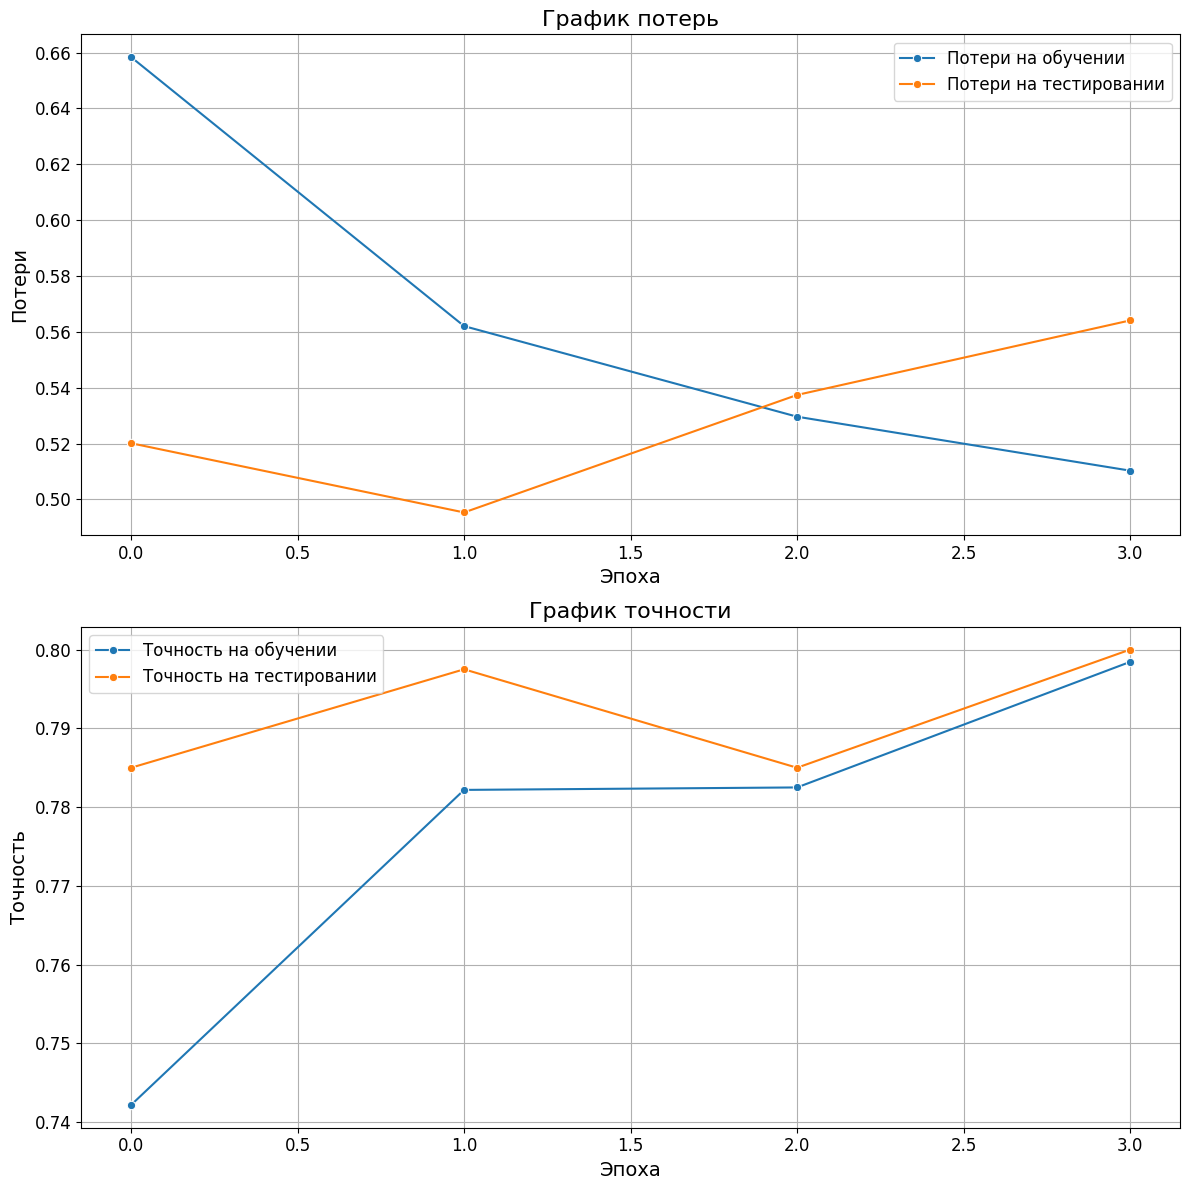

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['train_loss'], label='Потери на обучении', marker='o')
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['test_loss'], label='Потери на тестировании', marker='o')
axs[0].set_title('График потерь', fontsize=16)
axs[0].set_xlabel('Эпоха', fontsize=14)
axs[0].set_ylabel('Потери', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].grid(True)

sns.lineplot(ax=axs[1], x=data['epoch'], y=data['train_accuracy'], label='Точность на обучении', marker='o')
sns.lineplot(ax=axs[1], x=data['epoch'], y=data['test_accuracy'], label='Точность на тестировании', marker='o')
axs[1].set_title('График точности', fontsize=16)
axs[1].set_xlabel('Эпоха', fontsize=14)
axs[1].set_ylabel('Точность', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [28]:
print(f'Финальная точность на обучающем множестве: {data["train_accuracy"].to_list()[-1]:.4f}')
print(f'Финальная точность на тестовом множестве: {data["test_accuracy"].to_list()[-1]:.4f}')
num_params = sum(p.numel() for p in model.parameters())
print(f'Количество параметров в модели: {num_params}')

Финальная точность на обучающем множестве: 0.7984
Финальная точность на тестовом множестве: 0.8000
Количество параметров в модели: 134276932


<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [x] Проверено на семинаре

In [29]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
for param in model.features[:-1].parameters():
    param.requires_grad = False

In [30]:
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

In [31]:
run_data = train_model(model, dataloader_train, dataloader_test, criterion, optimizer, metric, device, epochs=4)

Epoch 0 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.44it/s]


Epoch 0 | Train loss: 1.1207 | Test loss: 0.6850
	| Train accuracy: 0.6484 | Test Accuracy: 0.7713


Epoch 1 – Testing: 100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Epoch 1 | Train loss: 0.8844 | Test loss: 0.6298
	| Train accuracy: 0.7703 | Test Accuracy: 0.7475


Epoch 2 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.48it/s]


Epoch 2 | Train loss: 0.5759 | Test loss: 0.7179
	| Train accuracy: 0.8409 | Test Accuracy: 0.7663


Epoch 3 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.42it/s]

Epoch 3 | Train loss: 0.6128 | Test loss: 0.8048
	| Train accuracy: 0.8631 | Test Accuracy: 0.7837


In [32]:
import pandas as pd

data = pd.DataFrame(
    run_data,
    columns=[
        'epoch', 'train_loss', 'test_loss',
        'train_accuracy', 'test_accuracy'
    ]
)
data

,epoch,train_loss,test_loss,train_accuracy,test_accuracy
0,0,1.120697,0.685027,0.648438,0.77125
1,1,0.884435,0.629788,0.770312,0.74750
2,2,0.575866,0.717852,0.840937,0.76625
3,3,0.612822,0.804781,0.863125,0.78375


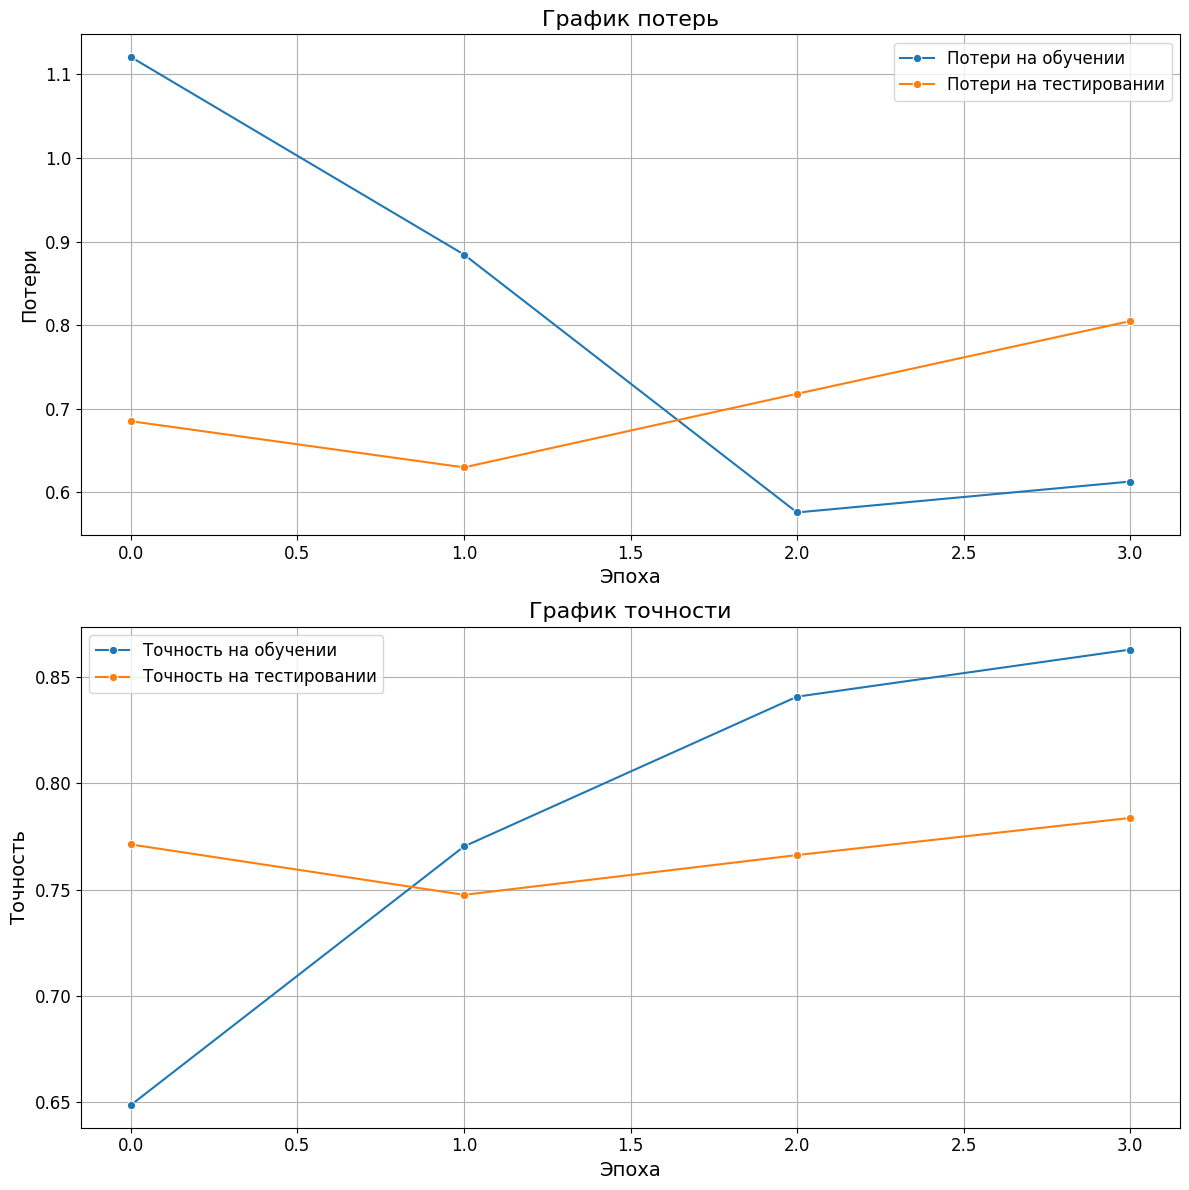

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['train_loss'], label='Потери на обучении', marker='o')
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['test_loss'], label='Потери на тестировании', marker='o')
axs[0].set_title('График потерь', fontsize=16)
axs[0].set_xlabel('Эпоха', fontsize=14)
axs[0].set_ylabel('Потери', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].grid(True)

sns.lineplot(ax=axs[1], x=data['epoch'], y=data['train_accuracy'], label='Точность на обучении', marker='o')
sns.lineplot(ax=axs[1], x=data['epoch'], y=data['test_accuracy'], label='Точность на тестировании', marker='o')
axs[1].set_title('График точности', fontsize=16)
axs[1].set_xlabel('Эпоха', fontsize=14)
axs[1].set_ylabel('Точность', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [34]:
print(f'Финальная точность на обучающем множестве: {data["train_accuracy"].to_list()[-1]:.4f}')
print(f'Финальная точность на тестовом множестве: {data["test_accuracy"].to_list()[-1]:.4f}')
num_params = sum(p.numel() for p in model.parameters())
print(f'Количество параметров в модели: {num_params}')

Финальная точность на обучающем множестве: 0.8631
Финальная точность на тестовом множестве: 0.7837
Количество параметров в модели: 134276932


<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [35]:
train_transforms = T.Compose([
    T.Resize((256, 256)),
    T.RandomRotation(degrees=90),
    T.CenterCrop((224, 224)),
    T.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
    T.ColorJitter(brightness=0.4, contrast=0.3, saturation=0.2, hue=0.1),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

test_transforms = models.VGG16_Weights.IMAGENET1K_V1.transforms()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [36]:
from torch.utils.data import ConcatDataset
import copy

In [ ]:
dataset = ImageFolder(root='./../data/cat_breeds_4')
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])

train_datasets = [copy.deepcopy(train_dataset) for _ in range(2)]
for i in train_datasets:
    i.dataset.transform = train_transforms
test_dataset.dataset.transform = test_transforms

extended_train_dataset = ConcatDataset(train_datasets)
dataloader_train = DataLoader(extended_train_dataset, batch_size=8, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [38]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
for param in model.features[:-1].parameters():
    param.requires_grad = False

In [39]:
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.classifier[-1].parameters(), lr=5e-4)

In [40]:
run_data = train_model(model, dataloader_train, dataloader_test, criterion, optimizer, metric, device, epochs=4)

Epoch 0 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


Epoch 0 | Train loss: 0.7604 | Test loss: 0.5406
	| Train accuracy: 0.6841 | Test Accuracy: 0.7975


Epoch 1 – Testing: 100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Epoch 1 | Train loss: 0.7318 | Test loss: 0.4903
	| Train accuracy: 0.7098 | Test Accuracy: 0.8087


Epoch 2 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.54it/s]


Epoch 2 | Train loss: 0.7156 | Test loss: 0.4904
	| Train accuracy: 0.7192 | Test Accuracy: 0.8025


Epoch 3 – Testing: 100%|██████████| 100/100 [00:08<00:00, 11.42it/s]

Epoch 3 | Train loss: 0.7029 | Test loss: 0.5471
	| Train accuracy: 0.7253 | Test Accuracy: 0.7987


In [41]:
data = pd.DataFrame(
    run_data,
    columns=[
        'epoch', 'train_loss', 'test_loss',
        'train_accuracy', 'test_accuracy'
    ]
)
data

,epoch,train_loss,test_loss,train_accuracy,test_accuracy
0,0,0.760444,0.540647,0.684062,0.79750
1,1,0.731789,0.490295,0.709844,0.80875
2,2,0.715571,0.490364,0.719219,0.80250
3,3,0.702895,0.547143,0.725312,0.79875


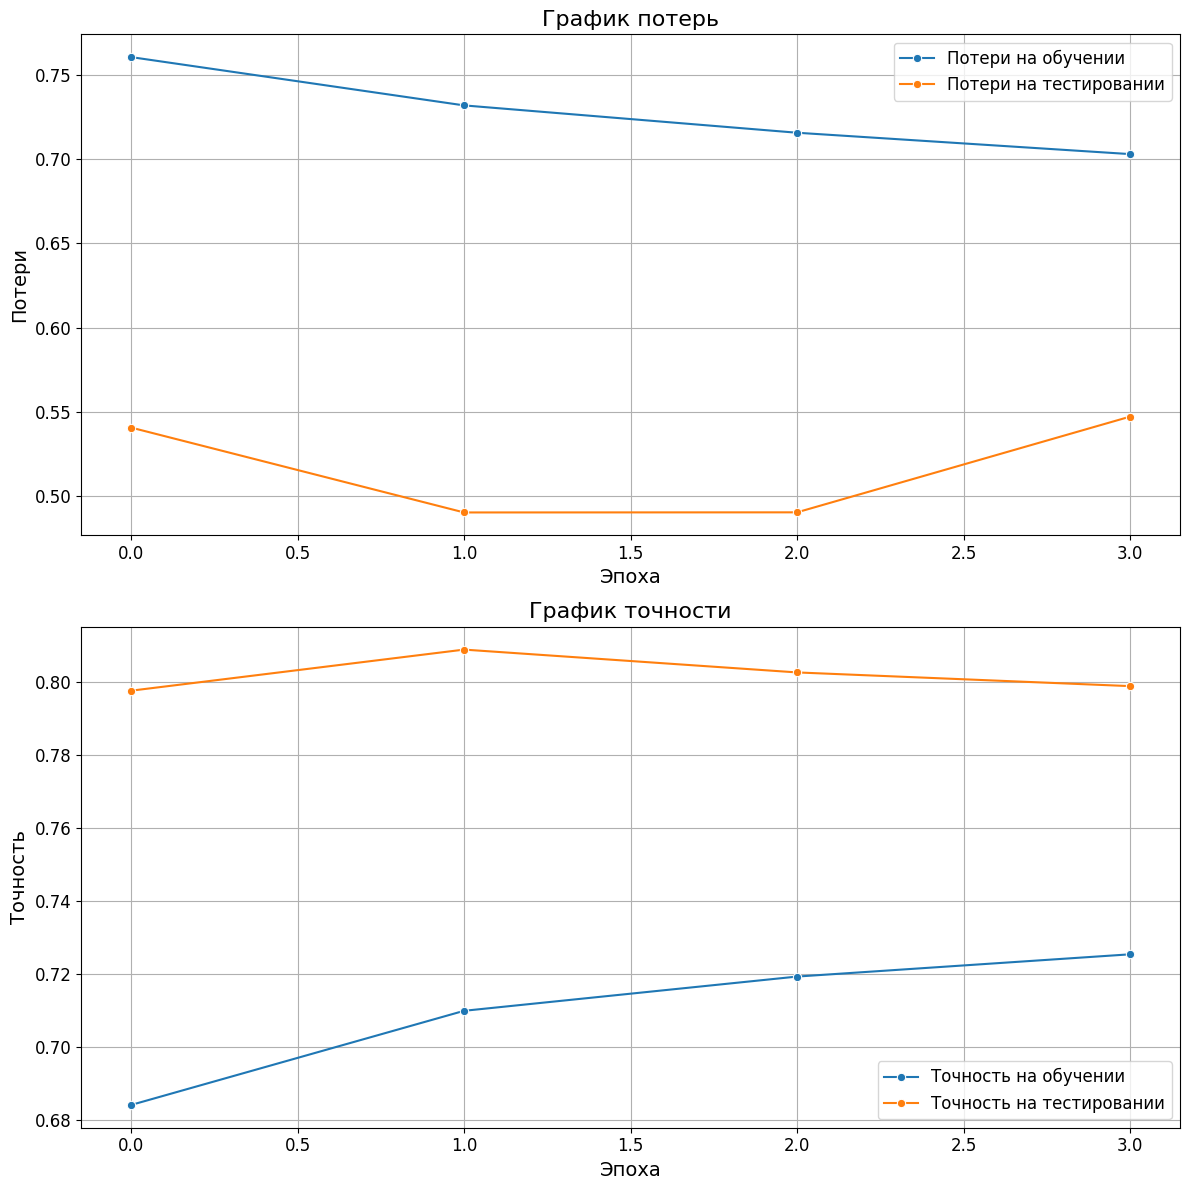

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['train_loss'], label='Потери на обучении', marker='o')
sns.lineplot(ax=axs[0], x=data['epoch'], y=data['test_loss'], label='Потери на тестировании', marker='o')
axs[0].set_title('График потерь', fontsize=16)
axs[0].set_xlabel('Эпоха', fontsize=14)
axs[0].set_ylabel('Потери', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].grid(True)

sns.lineplot(ax=axs[1], x=data['epoch'], y=data['train_accuracy'], label='Точность на обучении', marker='o')
sns.lineplot(ax=axs[1], x=data['epoch'], y=data['test_accuracy'], label='Точность на тестировании', marker='o')
axs[1].set_title('График точности', fontsize=16)
axs[1].set_xlabel('Эпоха', fontsize=14)
axs[1].set_ylabel('Точность', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [43]:
print(f'Финальная точность на обучающем множестве: {data["train_accuracy"].to_list()[-1]:.4f}')
print(f'Финальная точность на тестовом множестве: {data["test_accuracy"].to_list()[-1]:.4f}')
num_params = sum(p.numel() for p in model.parameters())
print(f'Количество параметров в модели: {num_params}')

Финальная точность на обучающем множестве: 0.7253
Финальная точность на тестовом множестве: 0.7987
Количество параметров в модели: 134276932
